In [4]:
# imports
SEED = 1111
import numpy as np
import pandas as pd
import numpy as np
import math
import os
import random as rn
from tensorflow.random import set_seed

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, LSTM

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
set_seed(SEED)
rn.seed(SEED)

In [5]:
path = 'https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1635233207&period2=1666769207&interval=1d&events=history&includeAdjustedClose=true'
dataset = pd.read_csv(path)

In [6]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-26,341.563324,364.980011,333.813324,339.476654,339.476654,187245000
1,2021-10-27,346.553345,356.959991,343.593323,345.953339,345.953339,115579500
2,2021-10-28,356.103333,360.333344,351.399994,359.013336,359.013336,81639600
3,2021-10-29,360.619995,371.736664,357.736664,371.333344,371.333344,89755200
4,2021-11-01,381.666656,403.250000,372.886658,402.863342,402.863342,168146100
...,...,...,...,...,...,...,...
247,2022-10-19,219.800003,222.929993,217.779999,222.039993,222.039993,66571500
248,2022-10-20,208.279999,215.550003,202.000000,207.279999,207.279999,117798100
249,2022-10-21,206.419998,214.660004,203.800003,214.440002,214.440002,75529300
250,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800


In [8]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%Y-%m-%d')

In [9]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-26,341.563324,364.980011,333.813324,339.476654,339.476654,187245000
1,2021-10-27,346.553345,356.959991,343.593323,345.953339,345.953339,115579500
2,2021-10-28,356.103333,360.333344,351.399994,359.013336,359.013336,81639600
3,2021-10-29,360.619995,371.736664,357.736664,371.333344,371.333344,89755200
4,2021-11-01,381.666656,403.250000,372.886658,402.863342,402.863342,168146100
...,...,...,...,...,...,...,...
247,2022-10-19,219.800003,222.929993,217.779999,222.039993,222.039993,66571500
248,2022-10-20,208.279999,215.550003,202.000000,207.279999,207.279999,117798100
249,2022-10-21,206.419998,214.660004,203.800003,214.440002,214.440002,75529300
250,2022-10-24,205.820007,213.500000,198.589996,211.250000,211.250000,100446800


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       252 non-null    float64       
 2   High       252 non-null    float64       
 3   Low        252 non-null    float64       
 4   Close      252 non-null    float64       
 5   Adj Close  252 non-null    float64       
 6   Volume     252 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [15]:
dataset.shape

(252, 7)

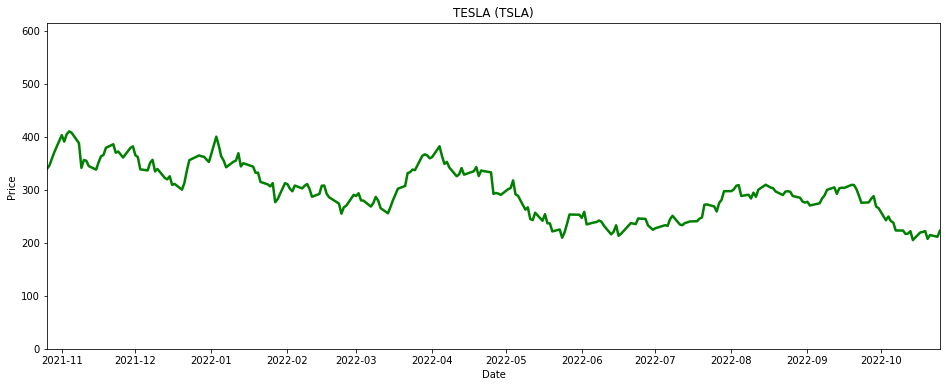

In [20]:
plt.figure(figsize=(16, 6))

plt.plot(dataset['Date'], dataset['Close'], color='green', linewidth=2.5)
plt.xlim(dataset['Date'].min(), dataset['Date'].max())
plt.ylim(0, dataset['Close'].max()*1.5)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('TESLA (TSLA)')

plt.show()

In [21]:
data_array = dataset[['Close']].values
data_array

array([[339.476654],
       [345.953339],
       [359.013336],
       [371.333344],
       [402.863342],
       [390.666656],
       [404.619995],
       [409.970001],
       [407.363342],
       [387.646667],
       [341.166656],
       [355.983337],
       [354.503326],
       [344.473328],
       [337.796661],
       [351.57666 ],
       [363.003326],
       [365.459991],
       [379.019989],
       [385.623322],
       [369.676666],
       [372.      ],
       [360.640015],
       [378.996674],
       [381.58667 ],
       [365.      ],
       [361.533325],
       [338.323334],
       [336.33667 ],
       [350.583344],
       [356.320007],
       [334.600006],
       [339.01001 ],
       [322.136658],
       [319.503326],
       [325.329987],
       [308.973328],
       [310.856659],
       [299.980011],
       [312.843323],
       [336.290009],
       [355.666656],
       [364.646667],
       [362.823334],
       [362.063324],
       [356.779999],
       [352.26001 ],
       [399.9

In [22]:
train_size = 0.8

train_data_size = math.ceil(len(dataset) * train_size)
train_data_size

202

In [23]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data_array = scaler.fit_transform(data_array)

scaled_data_array

array([[0.65609646],
       [0.68769312],
       [0.75140664],
       [0.81151011],
       [0.96532999],
       [0.90582815],
       [0.97389986],
       [1.        ],
       [0.98728335],
       [0.89109506],
       [0.66434117],
       [0.73662472],
       [0.72940445],
       [0.68047285],
       [0.64790057],
       [0.71512664],
       [0.77087191],
       [0.78285681],
       [0.8490096 ],
       [0.88122412],
       [0.80342796],
       [0.81476241],
       [0.75934244],
       [0.84889586],
       [0.86153121],
       [0.78061273],
       [0.76370047],
       [0.65046996],
       [0.64077797],
       [0.71028072],
       [0.73826717],
       [0.63230561],
       [0.65381992],
       [0.57150286],
       [0.55865608],
       [0.58708159],
       [0.50728522],
       [0.5164731 ],
       [0.4634111 ],
       [0.52616509],
       [0.64055033],
       [0.73507978],
       [0.77888899],
       [0.76999381],
       [0.76628609],
       [0.74051125],
       [0.71846038],
       [0.951

In [24]:
train_data = scaled_data_array[:train_data_size, :]

In [25]:
# Spliting data
X_train = []
y_train = []

for i in range(100, len(train_data)):
    X_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 102:
        print(i)
        print(X_train[i-100])
        print(y_train[i-100])
        print()

100
[0.65609646 0.68769312 0.75140664 0.81151011 0.96532999 0.90582815
 0.97389986 1.         0.98728335 0.89109506 0.66434117 0.73662472
 0.72940445 0.68047285 0.64790057 0.71512664 0.77087191 0.78285681
 0.8490096  0.88122412 0.80342796 0.81476241 0.75934244 0.84889586
 0.86153121 0.78061273 0.76370047 0.65046996 0.64077797 0.71028072
 0.73826717 0.63230561 0.65381992 0.57150286 0.55865608 0.58708159
 0.50728522 0.5164731  0.4634111  0.52616509 0.64055033 0.73507978
 0.77888899 0.76999381 0.76628609 0.74051125 0.71846038 0.95100334
 0.86938557 0.76942464 0.7313396  0.66996782 0.72063939 0.73085172
 0.79885837 0.67744819 0.70680063 0.67574068 0.61905224 0.62006046
 0.53489769 0.51229387 0.49343023 0.52434383 0.34821283 0.37626435
 0.52322171 0.51432653 0.47271273 0.44910068 0.50143108 0.47544469
 0.49928452 0.51554617 0.4709077  0.39846157 0.4240902  0.49998366
 0.50154482 0.42504959 0.39355059 0.33590262 0.24241384 0.30214331
 0.31694146 0.41542266 0.40556795 0.43080621 0.36478355 0.

In [26]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [27]:
y_train.shape

(102,)

In [28]:
X_train.shape

(102, 100)

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.65609646],
        [0.68769312],
        [0.75140664],
        ...,
        [0.36631211],
        [0.41732521],
        [0.47227367]],

       [[0.68769312],
        [0.75140664],
        [0.81151011],
        ...,
        [0.41732521],
        [0.47227367],
        [0.49791854]],

       [[0.75140664],
        [0.81151011],
        [0.96532999],
        ...,
        [0.47227367],
        [0.49791854],
        [0.61633651]],

       ...,

       [[0.47227367],
        [0.49791854],
        [0.61633651],
        ...,
        [0.41678865],
        [0.38219992],
        [0.43597744]],

       [[0.49791854],
        [0.61633651],
        [0.62467889],
        ...,
        [0.38219992],
        [0.43597744],
        [0.39828277]],

       [[0.61633651],
        [0.62467889],
        [0.64876244],
        ...,
        [0.43597744],
        [0.39828277],
        [0.46365497]]])

In [30]:
X_train.shape

(102, 100, 1)

In [31]:
model_01 = Sequential()
model_01.add(LSTM(40, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model_01.add(LSTM(40))
model_01.add(Dense(20, activation='relu'))
model_01.add(Dense(1))

model_01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 40)           6720      
                                                                 
 lstm_1 (LSTM)               (None, 40)                12960     
                                                                 
 dense (Dense)               (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 20,521
Trainable params: 20,521
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_01.compile(optimizer='adam', loss='mean_squared_error')
history_1 = model_01.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
102/102 [==============================] - 8s 40ms/step - loss: 0.0352
Epoch 2/10
102/102 [==============================] - 4s 39ms/step - loss: 0.0124
Epoch 3/10
102/102 [==============================] - 4s 40ms/step - loss: 0.0130
Epoch 4/10
102/102 [==============================] - 4s 40ms/step - loss: 0.0130
Epoch 5/10
102/102 [==============================] - 4s 40ms/step - loss: 0.0097
Epoch 6/10
102/102 [==============================] - 4s 40ms/step - loss: 0.0110
Epoch 7/10
102/102 [==============================] - 4s 39ms/step - loss: 0.0084
Epoch 8/10
102/102 [==============================] - 4s 41ms/step - loss: 0.0077
Epoch 9/10
102/102 [==============================] - 4s 40ms/step - loss: 0.0073
Epoch 10/10
102/102 [==============================] - 4s 41ms/step - loss: 0.0071


In [33]:
# Creating test data
test_data_scaled = scaled_data_array[train_data_size-100:, :]
test_data = data_array[train_data_size-100:, :]

# Splitting data for X and y:
X_test = []
y_test = []

for i in range(100, len(test_data_scaled)):
    X_test.append(test_data_scaled[i-100:i, 0])
    y_test.append(test_data[i, 0])
    if i <= 100:
        print(X_test)
        print(y_test)
        print()

# Transforming X_test and y_test for Numpy Array
X_test, y_test = np.array(X_test), np.array(y_test)

# Data dimension transformation
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

[array([0.62467889, 0.64876244, 0.64342864, 0.77547396, 0.78804441,
       0.77897028, 0.75231735, 0.76368425, 0.86265333, 0.7745308 ,
       0.7005399 , 0.71924095, 0.66757725, 0.58698407, 0.60490455,
       0.66250369, 0.60173354, 0.63310242, 0.67190298, 0.58904934,
       0.64040398, 0.63433828, 0.62290632, 0.42516349, 0.43344066,
       0.42693591, 0.41595923, 0.46828963, 0.47855079, 0.54907799,
       0.42005717, 0.40764945, 0.27992971, 0.30095614, 0.19356361,
       0.18380656, 0.25143914, 0.17790351, 0.23846224, 0.15422641,
       0.15359217, 0.07956873, 0.09745661, 0.02144925, 0.07127525,
       0.15084398, 0.23524248, 0.23301455, 0.20392228, 0.2602368 ,
       0.14404653, 0.16240606, 0.16536574, 0.17990372, 0.16936609,
       0.13289097, 0.05242784, 0.07756852, 0.13664746, 0.03956484,
       0.05742019, 0.15634044, 0.15170585, 0.14674604, 0.19863724,
       0.19479946, 0.135005  , 0.11464533, 0.09504988, 0.108661  ,
       0.13697269, 0.13046801, 0.1929619 , 0.22330633, 0.1432

In [34]:
forecast_test = model_01.predict(X_test)
forecast_test = scaler.inverse_transform(forecast_test)
forecast_test[-5:]

2/2 [==============================] - 1s 21ms/step


array([[222.05952],
       [223.21786],
       [222.94621],
       [222.97194],
       [222.7923 ]], dtype=float32)

In [35]:
def calculate_mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred.reshape(1, -1)[0])
    return np.mean(np.abs((actual - pred) / actual)) * 100

calculate_mape(actual=y_test, pred=forecast_test)

5.005417639866901

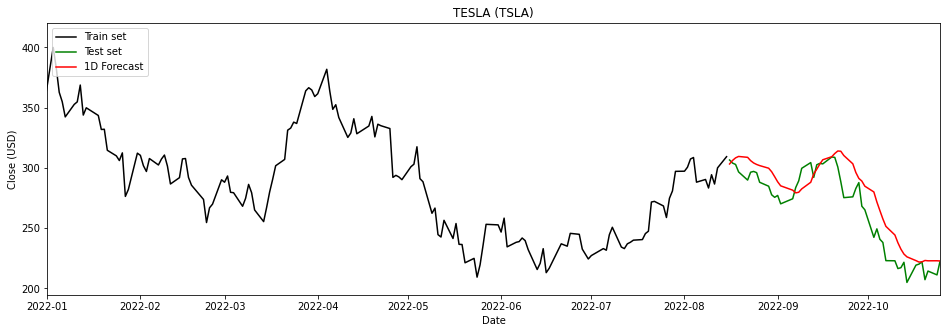

In [44]:
import datetime

plt.figure(figsize=(16, 5))

# Plot train values
plt.plot(dataset.Date.values[:train_data_size], data_array[:train_data_size], 
         label='Train set', color='black')
# Plot test values
plt.plot(dataset.Date.values[train_data_size:], data_array[train_data_size:], 
         label='Test set', color='green')
# Plot predictions
plt.plot(dataset.Date.values[train_data_size:], forecast_test, 
         label='1D Forecast', color='red')
# Decorations
plt.xlim([datetime.date(2022, 1, 1), dataset.Date.values[-1]])
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Close (USD)')
plt.title('TESLA (TSLA)')

plt.show()

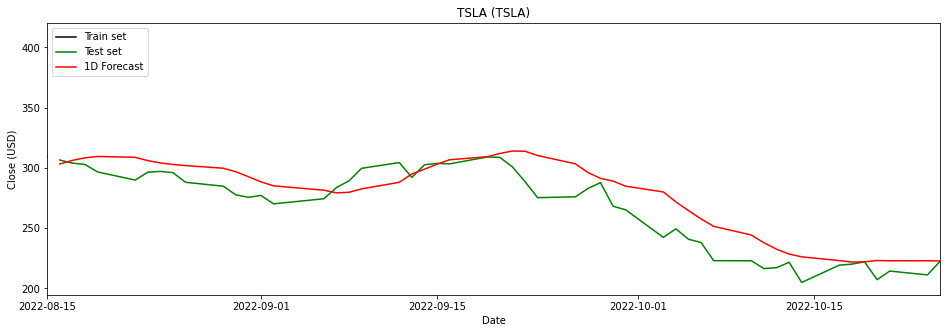

In [50]:
import datetime

plt.figure(figsize=(16, 5))

# Plot train values
plt.plot(dataset.Date.values[:train_data_size], data_array[:train_data_size], 
         label='Train set', color='black')
# Plot test values
plt.plot(dataset.Date.values[train_data_size:], data_array[train_data_size:], 
         label='Test set', color='green')
# Plot predictions
plt.plot(dataset.Date.values[train_data_size:], forecast_test, 
         label='1D Forecast', color='red')
# Decorations
plt.xlim([datetime.date(2022, 8, 15), dataset.Date.values[-1]])
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Close (USD)')
plt.title('TSLA (TSLA)')

plt.show()